# Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
sns.set_theme(style='darkgrid',palette='rainbow')

# Load data

In [2]:
df = pd.read_csv('ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [3]:
df.shape

(1436, 11)

In [4]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [5]:
df.dtypes

Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object

In [6]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [7]:
df.duplicated().sum()

1

In [8]:
df.drop_duplicates(inplace=True)

<Axes: >

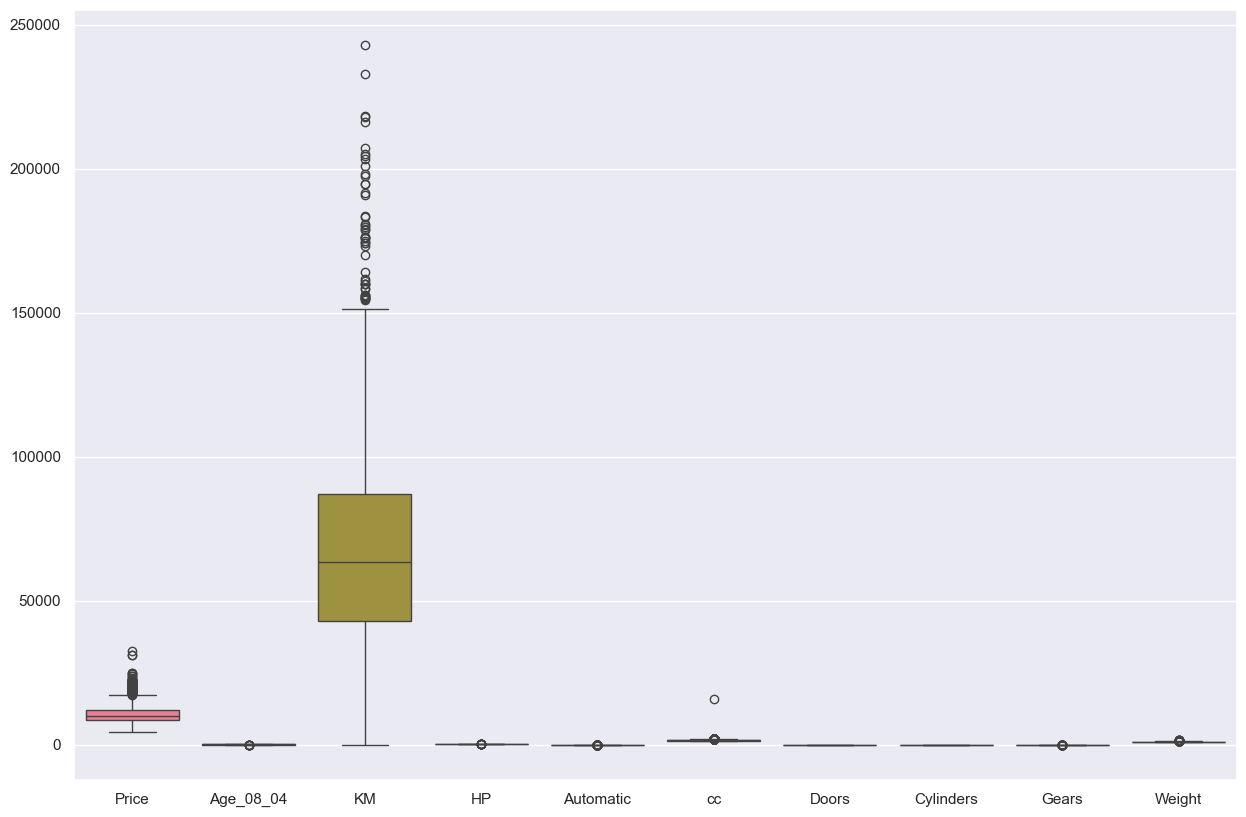

In [9]:
plt.rcParams['figure.figsize'] = (15,10)
sns.boxplot(data=df)

In [10]:
'''Above boxplot shows that outliers are present in our data, both above and below the extremes.
I will treat these outliers to improve the model's performance.'''

"Above boxplot shows that outliers are present in our data, both above and below the extremes.\nI will treat these outliers to improve the model's performance."

In [11]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,0.055749,1576.560976,4.032753,4.0,5.026481,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,0.229517,424.387533,0.952667,0.0,0.188575,52.251882
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.000000,2.000000,4.0,3.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.000000,3.000000,4.0,5.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.000000,1600.000000,4.000000,4.0,5.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.000000,1600.000000,5.000000,4.0,5.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.000000,5.000000,4.0,6.000000,1615.000000


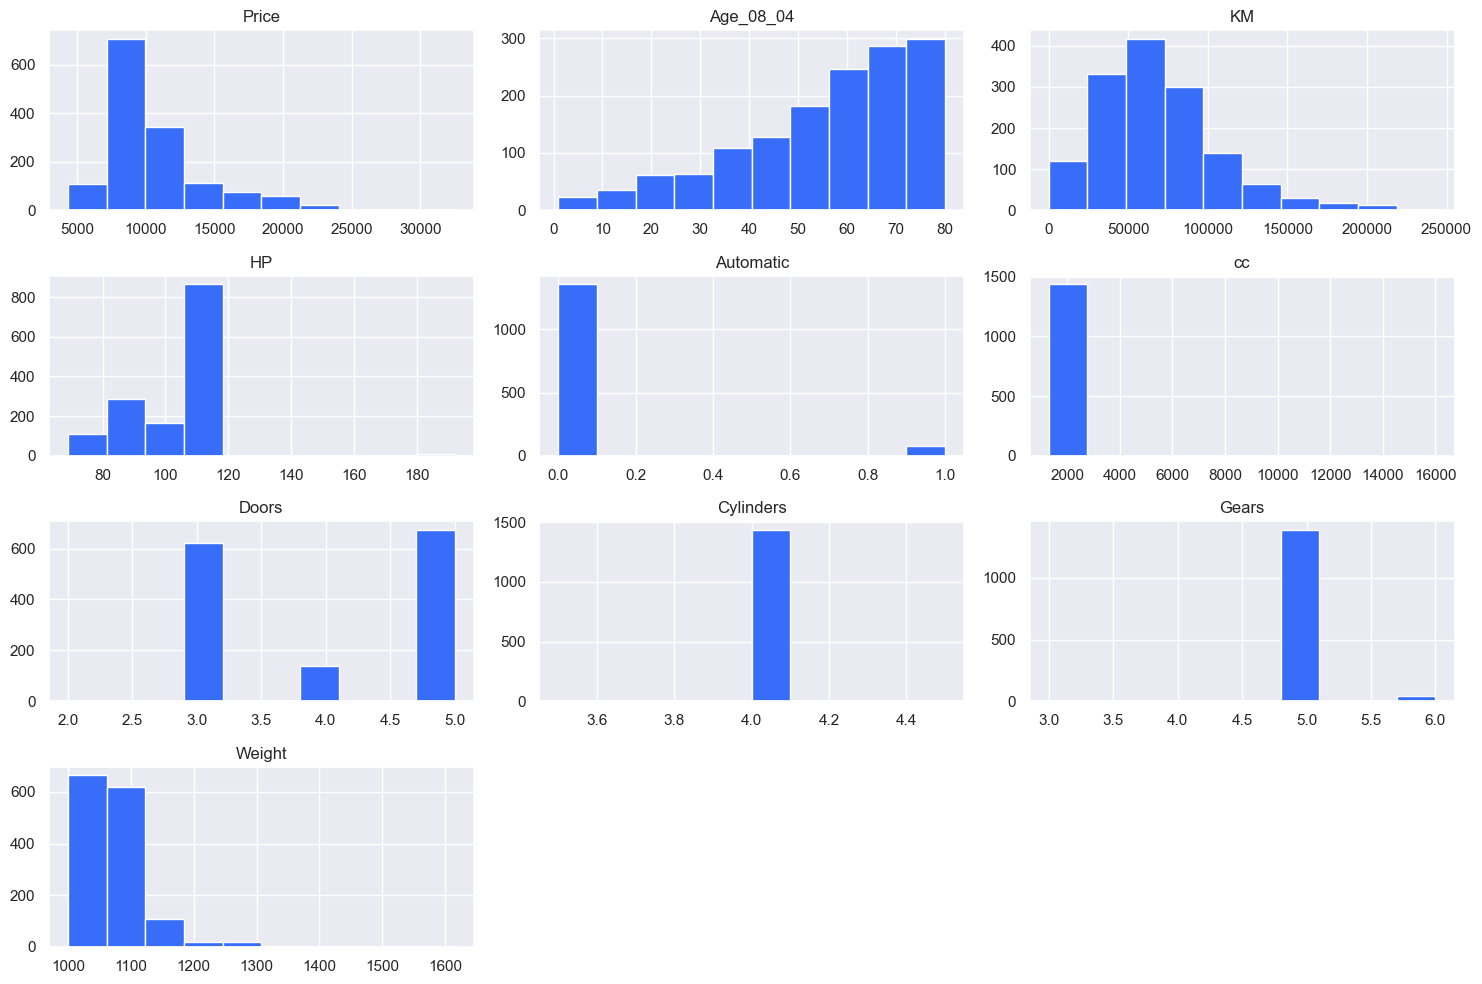

In [12]:
df.hist()
plt.tight_layout()


#Completed basic data inspection using .shape, .info(), and .describe().
Found no missing values.
Identified 1 duplicate entry, which was dropped.
Boxplots of numerical features revealed the presence of outliers, especially in KM and Price. 
These outliers could impact the regression model and will be taken care during the preprocessing if necessary.
Histogram indicated that features like KM and Price are right - skewed , with outliers extending beyond the upper extremes.
and Age_08_04 apeared negatively skewed, with outliers below the lower extreme.


In [13]:
#converting categorical columns into numerical format using get_dummies.

In [14]:
df = pd.get_dummies(df, columns=['Fuel_Type'], drop_first=True)

In [15]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,False,True
1432,10845,72,19000,86,0,1300,3,4,5,1015,False,True
1433,8500,71,17016,86,0,1300,3,4,5,1015,False,True
1434,7250,70,16916,86,0,1300,3,4,5,1015,False,True


In [16]:
df[['Fuel_Type_Diesel', 'Fuel_Type_Petrol']] = df[['Fuel_Type_Diesel', 'Fuel_Type_Petrol']].astype(int)
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,1,0
1,13750,23,72937,90,0,2000,3,4,5,1165,1,0
2,13950,24,41711,90,0,2000,3,4,5,1165,1,0
3,14950,26,48000,90,0,2000,3,4,5,1165,1,0
4,13750,30,38500,90,0,2000,3,4,5,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,0,1300,3,4,5,1025,0,1
1432,10845,72,19000,86,0,1300,3,4,5,1015,0,1
1433,8500,71,17016,86,0,1300,3,4,5,1015,0,1
1434,7250,70,16916,86,0,1300,3,4,5,1015,0,1


In [17]:
# treating outliers to improve the model's performance.

In [18]:
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] > upper, upper,
                           np.where(df[col] < lower, lower, df[col]))
    return df

In [19]:
columns_to_cap = ['Price','Age_08_04','KM','HP','Automatic','cc','Gears','Weight','Fuel_Type_Diesel','Fuel_Type_Petrol']

In [20]:
df = cap_outliers(df, columns_to_cap)

In [21]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000,1435.0,1435.0,1435.000000,1435.0,1435.0
mean,10495.964460,55.992334,67644.520383,101.093380,0.0,1558.327526,4.032753,4.0,5.0,1068.520906,0.0,1.0
std,2977.598549,18.529725,34725.393258,13.146145,0.0,168.788311,0.952667,0.0,0.0,37.722708,0.0,0.0
min,4350.000000,5.000000,1.000000,69.000000,0.0,1300.000000,2.000000,4.0,5.0,1000.000000,0.0,1.0
25%,8450.000000,44.000000,43000.000000,90.000000,0.0,1400.000000,3.000000,4.0,5.0,1040.000000,0.0,1.0
50%,9900.000000,61.000000,63451.000000,110.000000,0.0,1600.000000,4.000000,4.0,5.0,1070.000000,0.0,1.0
75%,11950.000000,70.000000,87041.500000,110.000000,0.0,1600.000000,5.000000,4.0,5.0,1085.000000,0.0,1.0
max,17200.000000,80.000000,153103.750000,140.000000,0.0,1900.000000,5.000000,4.0,5.0,1152.500000,0.0,1.0


<Axes: >

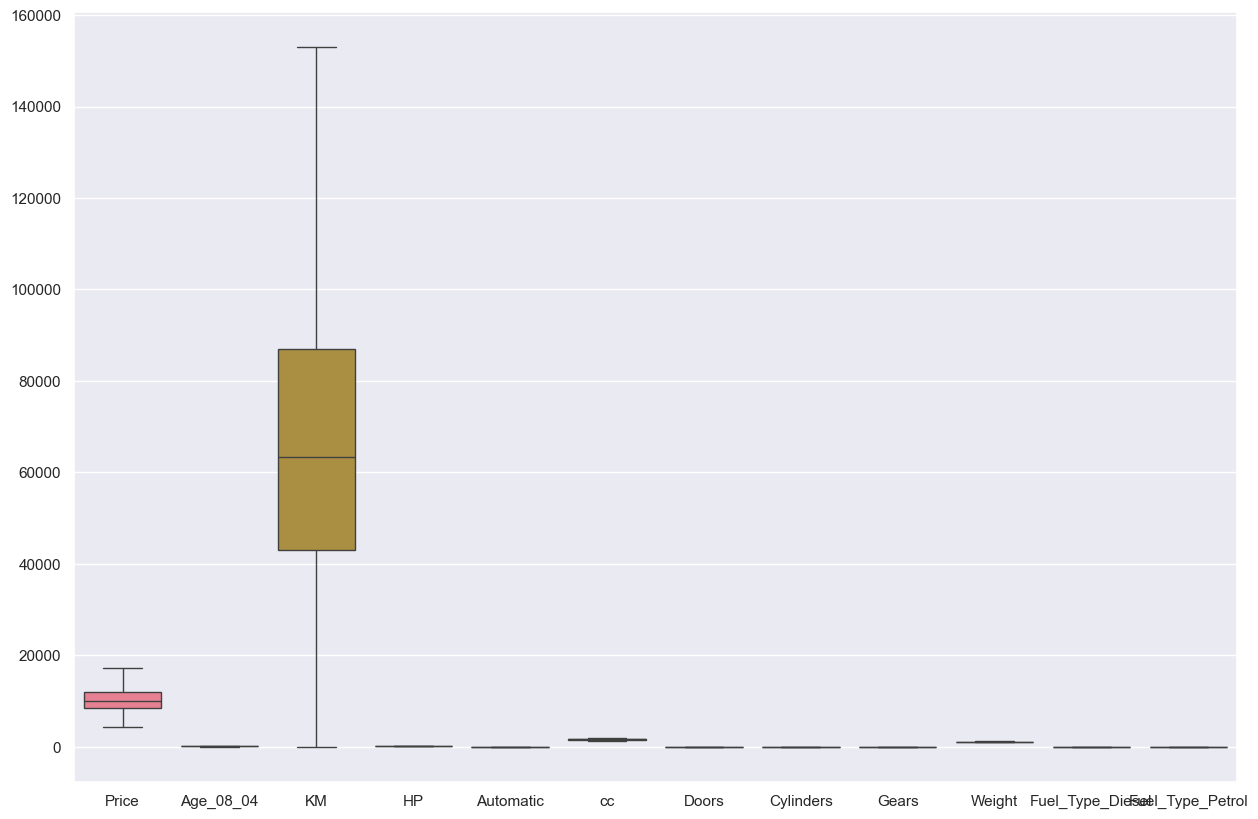

In [22]:
plt.rcParams['figure.figsize'] = (15,10)
sns.boxplot(data=df)

In [23]:
# Outliers have been removed. As we can see in the boxplot above, the outliers have been treated successfully.

In [24]:
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()

In [25]:
df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
Price,1.000000,-0.895340,-0.607949,0.254427,NaN,0.129352,0.183010,NaN,NaN,0.507823,NaN,NaN
Age_08_04,-0.895340,1.000000,0.530670,-0.129602,NaN,-0.136644,-0.146704,NaN,NaN,-0.476150,NaN,NaN
KM,-0.607949,0.530670,1.000000,-0.329729,NaN,0.258680,-0.036618,NaN,NaN,0.000977,NaN,NaN
HP,0.254427,-0.129602,-0.329729,1.000000,NaN,0.098192,0.120139,NaN,NaN,0.024877,NaN,NaN
Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc,0.129352,-0.136644,0.258680,0.098192,NaN,1.000000,0.138433,NaN,NaN,0.717782,NaN,NaN
Doors,0.183010,-0.146704,-0.036618,0.120139,NaN,0.138433,1.000000,NaN,NaN,0.381177,NaN,NaN
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Weight,0.507823,-0.476150,0.000977,0.024877,NaN,0.717782,0.381177,NaN,NaN,1.000000,NaN,NaN


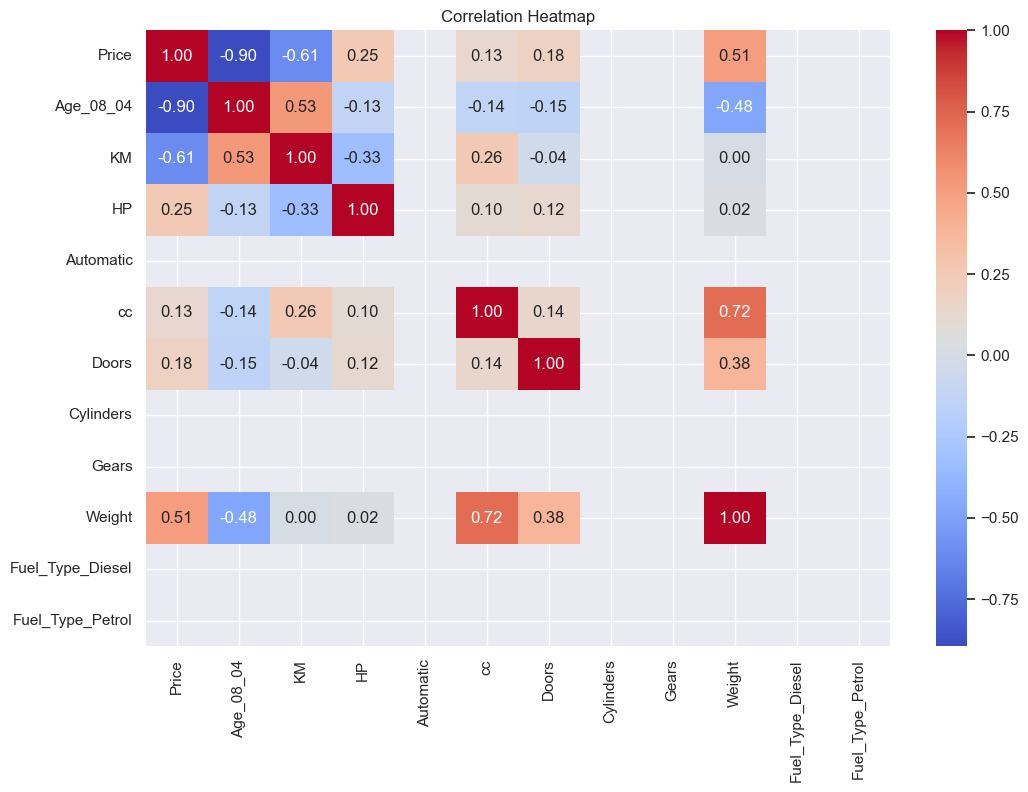

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


#from above heatmap. we saw that CC and Doors have very low correlation with price.
#They may not help much in predicting the car's price and can be removed to make the model simpler.

In [28]:
# Spliting the dataset into training and testing .

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X = df.drop('Price' , axis=1)
y = df['Price']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
from sklearn.linear_model import LinearRegression

model1 = LinearRegression()
model1.fit(X_train, y_train)

print("Intercept:", model1.intercept_)
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model1.coef_})
print(coef_df)

Intercept: -7494.124215325779
             Feature   Coefficient
0          Age_08_04 -1.046720e+02
1                 KM -1.582132e-02
2                 HP  2.935386e+01
3          Automatic -7.460699e-14
4                 cc -2.648714e+00
5              Doors -1.189325e+02
6          Cylinders  0.000000e+00
7              Gears  0.000000e+00
8             Weight  2.484288e+01
9   Fuel_Type_Diesel  0.000000e+00
10  Fuel_Type_Petrol  0.000000e+00


In [33]:
model1 = LinearRegression()
model1.fit(X_train, y_train)


LinearRegression()

In [198]:
# Original columns without any removal or scaling.

In [34]:
X_train2 = X_train.drop(['cc', 'Doors'], axis=1)
X_test2 = X_test.drop(['cc', 'Doors'], axis=1)

model2 = LinearRegression()
model2.fit(X_train2, y_train)


LinearRegression()

In [35]:
# Removing two columns (CC and Doors) which were found to be less correlated with the target variable that is price

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model3 = LinearRegression()
model3.fit(X_train_scaled, y_train)


LinearRegression()

In [37]:
# Applying feature scaling using StandardScaler to bring all variables onto the same scale.

In [38]:
y_pred1 = model1.predict(X_test)
y_pred1

array([10149.56948723, 10093.45210804,  9075.31486287,  9325.56266805,
        8898.20036497,  8894.55051797,  8357.04632144,  8364.03481709,
       11642.13336586, 12184.16630533,  9387.17134083,  9300.35860439,
       12567.59887367, 12080.89032306,  8935.18151341, 11497.19638941,
       12153.02649162, 14263.05083326, 11944.80225645, 11417.71912651,
       11277.46429425, 17377.1618174 ,  9676.71572773, 10482.83438517,
        7910.10048462, 15209.35139816,  7685.38751371,  8238.6135348 ,
       15233.04037603, 13237.35069852,  8236.05050645, 10107.31857157,
        9871.09804145,  9938.49366649,  9899.29966721,  8599.47903996,
        8662.7611704 ,  9822.17716603, 15842.18175111, 10427.40047356,
        9081.79248828,  9436.92147329,  9666.14809986,  8555.19450699,
       10327.56023928, 16625.46752088, 10459.76275034,  8983.53137054,
       10308.95492017, 11811.58211589, 12632.53355864,  7025.07863521,
       14582.5978509 , 15648.46659909,  6752.73494358,  7631.32330427,
      

In [39]:
# Predicted using all the original features without any removal or scaling.

In [40]:
y_pred2 = model2.predict(X_test2)
y_pred2

array([10060.94250347, 10174.64990455,  9285.92429453,  9470.68830588,
        8785.30992975,  8564.57537407,  8559.37246437,  8438.86062089,
       11687.85391973, 12285.03480278,  9202.4443922 ,  9348.10656669,
       12780.6739828 , 12211.08560357,  9006.6216303 , 11413.45493511,
       12097.13186109, 14512.46514786, 11581.25120743, 11518.65418814,
       11569.44304229, 17024.54710032,  9792.50344707, 10518.59926226,
        7651.75896511, 15125.23325266,  7498.60655591,  8456.68289406,
       14746.47448388, 13351.00986636,  8237.02453515, 10642.04885554,
        9985.60709796, 10037.59240334, 10089.27372334,  8557.0750016 ,
        8984.8573813 ,  9915.28483111, 15374.47361169, 10587.82224616,
        8792.47831784,  9537.87296031,  9615.67561468,  8584.80680954,
       10453.83132766, 16388.78956602, 10108.77598442,  8808.19052875,
       10730.23363912, 12564.19352597, 12619.74864439,  6797.60598559,
       14003.60813839, 15305.51270573,  6374.40601975,  8211.59386326,
      

In [41]:
# Predicted after removing two columns (CC and Doors) which were found to be less correlated with the price.

In [42]:
y_pred3 = model3.predict(X_test_scaled)
y_pred3

array([10149.56948723, 10093.45210804,  9075.31486287,  9325.56266805,
        8898.20036497,  8894.55051797,  8357.04632144,  8364.03481709,
       11642.13336586, 12184.16630533,  9387.17134083,  9300.35860439,
       12567.59887367, 12080.89032306,  8935.18151341, 11497.19638941,
       12153.02649162, 14263.05083326, 11944.80225645, 11417.71912651,
       11277.46429425, 17377.1618174 ,  9676.71572773, 10482.83438517,
        7910.10048462, 15209.35139816,  7685.38751371,  8238.6135348 ,
       15233.04037603, 13237.35069852,  8236.05050645, 10107.31857157,
        9871.09804145,  9938.49366649,  9899.29966721,  8599.47903996,
        8662.7611704 ,  9822.17716603, 15842.18175111, 10427.40047356,
        9081.79248828,  9436.92147329,  9666.14809986,  8555.19450699,
       10327.56023928, 16625.46752088, 10459.76275034,  8983.53137054,
       10308.95492017, 11811.58211589, 12632.53355864,  7025.07863521,
       14582.5978509 , 15648.46659909,  6752.73494358,  7631.32330427,
      

In [43]:
# Predicted after applying feature scaling using StandardScaler to bring all variables onto the same scale.

In [44]:
from sklearn.metrics import r2_score, mean_squared_error

In [45]:
r2_1 = r2_score(y_test, y_pred1)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred1))
print(f"Model 1 All Features R2: {r2_1}, RMSE: {rmse_1}")

Model 1 All Features R2: 0.8460197860710084, RMSE: 1145.941894575353



#R² = 0.8460: This means that 84.60% of the variation in the target variable (Price) is explained by the features in the model. 
This is a fairly strong fit, indicating that the model does a good job at predicting the car's price.

RMSE = 1145.94: The RMSE value tells us that the average prediction error is about 1145.94
The lower this value, the better the model’s performance. While the RMSE isn't too low, it's still quite decent given that car prices can vary widely.

In [48]:
r2_2 = r2_score(y_test, y_pred2)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print(f"Model 2 All Features R2: {r2_2}, RMSE: {rmse_2}")

Model 2 All Features R2: 0.8469228311341661, RMSE: 1142.5766606357518



#R² = 0.8469: The R² has slightly improved to 84.69%, which suggests that dropping cc and Doors didn’t affect the model’s predictive power much.
In fact, it slightly increased the ability of the model to explain the price variation.

RMSE = 1142.58: The RMSE has slightly decreased to 1142.57,
indicating a slight improvement in the accuracy of the predictions by removing cc and Doors

In [49]:
r2_3 = r2_score(y_test, y_pred3)
rmse_3 = np.sqrt(mean_squared_error(y_test, y_pred3))
print(f"Model 3 All Features R2: {r2_3}, RMSE: {rmse_3}")

Model 3 All Features R2: 0.8460197860710084, RMSE: 1145.941894575353



#R² = 0.8460: The R² for the scaled features is the same as Model 1 at 84.60%, 
indicating that scaling the features did not improve the model’s ability to explain the variation in Price.

RMSE = 1145.94: The RMSE is also the same as Model 1 at 1145.94 EUR, 
showing that scaling didn’t have a noticeable impact on reducing prediction errors.

In [50]:
# Applying Lasso and Ridge methods on the model.

In [51]:
# Lasso

In [52]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)  
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)

r2_lasso = r2_score(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"Lasso Model R2: {r2_lasso}, RMSE: {rmse_lasso}")

Lasso Model R2: 0.8460232383213664, RMSE: 1145.9290484427593


In [53]:
# Ridge

In [54]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1) 
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

r2_ridge = r2_score(y_test, y_pred_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"Ridge Model R2: {r2_ridge}, RMSE: {rmse_ridge}")

Ridge Model R2: 0.8460201032550224, RMSE: 1145.9407143112533


#R² Score:

Both the Lasso and Ridge models have an R² score of 0.8460, which means they explain 84.60% of the variance in the data.
This indicates that the models are quite good at predicting car prices based on the features provided.

#RMSE (Root Mean Squared Error):

The RMSE values are also very similar, with Lasso having 1145.92 and Ridge having 1145.94 
Since the RMSE values are close to each other, it indicates that both models have similar predictive accuracy.

#Conclusion:
Since both Lasso and Ridge produced nearly identical performance (R² and RMSE), 
it suggests that regularization (via Lasso or Ridge) did not significantly improve the model compared to the original Linear Regression model.

# Interview Questions

#1. What is Normalization & Standardization and how is it helpful?

Normalization and Standardization are techniques used to scale or transform data so that it's easier for machines to understand and process. 
Normalization Changes the data to fit between 0 and 1 (or -1 and 1) e.g. - Min-Max Scaling and standardization transforms data so that it has a 
mean (average) of 0 and a standard deviation of 1 e.g. -  Z-Score Normalization.
Normalization technique used when we know the data is bounded and want to scale it to 0–1 (e.g., images, percentages)
Standardization technique used when data has outliers or we want a normal distribution
Normalization -   Deep Learning, NLP, Image Processing
Standardization   -   Logistic Regression, SVM, PCA, KNN, Statistics
'''

#2. What techniques can be used to address multicollinearity in multiple linear regression?

To address multicollinearity in multiple linear regression several techniques can be used:
removing redundant variables, combining variables, using regularization methods like Ridge or Lasso regression, 
collecting more data, or applying Principal Component Analysis (PCA).
